In [2]:
import requests,re

In [3]:
import pandas as pd

In [4]:
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 Edge/16.16299'}

In [5]:
url = 'http://www.laoyuegou.com/x/zh-cn/lol/lol/godrank.html?region=cn&area=3'

In [6]:
html_cn = requests.get(url,headers = head)

In [8]:
ren = re.compile(r'class="cn-li.*?href="(.*?)">',re.S)

In [22]:
zhanqu_list_cn = re.findall(ren,html_cn.text)

In [10]:
rem = re.compile(r'class="subStrTitle">(.*?)</span>.*?server">(.*?)</div>.*?class="icon-dan"><em>(.*?)</em>.*?<span>(.*?)<em class="color-win">(.*?)<.*?\t<span>/</span>.*?<span>(.*?)<em class="color-defeat">(.*?)</em>.*?"percentage">(.*?)</span>.*?/score/(.*?).png.*?color-zhongdan">(.*?)</span>.*?alt="(.*?)"/>.*?alt="(.*?)"/>.*?alt="(.*?)"/>', re.S)

In [15]:
data = re.findall(rem,html_cn.text)

In [17]:
data2 = pd.DataFrame(data)

In [20]:
data2.to_csv(r'C:\Users\caiha\Desktop\New folder (2)\LOL.csv',header = False,index = False, mode= 'a+')

In [26]:
def upwodn_cn(zhanqu_list_cn):
    for zhanqu in zhanqu_list_cn:
        for m in range(1,11):
            url = zhanqu +'&page='+ str(m)
            im = requests.get(url, headers = head)
            if im.status_code == 200:
                data=re.findall(rem,im.text)
                data = pd.DataFrame(data)
                data.to_csv(r'C:\Users\caiha\Desktop\New folder (2)\LOL.csv',header = False,index = False, mode= 'a+')

In [27]:
upwodn_cn(zhanqu_list_cn)

In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif']= ['SimHei']

In [4]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,6.]

In [5]:
data = pandas.read_csv(r'C:\Users\caiha\Desktop\New folder (2)\LOL.csv - LOL.csv')

In [6]:
data_cn = data[0:196]

In [9]:
data_cn.tail()

,ID,Area,Winning Point,Victory Times,Victory,Defeat Times,Defeat,Win Rate,Performance,Prefer Location,Prefer Hero 1,Prefer Hero 2,Prefer Hero 3
191,dog2,America,469,0,victory,0,defeat,100.00%,S,Jungle,Lee Sin,Jarvan IV,Maokai
192,INTelligent feed,America,469,237,victory,219,defeat,52.00%,A+,Jungle,TwistedFate,XinZhao,Jhin
193,GL IM ZWAG,America,468,688,victory,657,defeat,51.20%,A-,Sup,Kassdin,Thresh,Alistar
194,fwii,America,467,803,victory,784,defeat,50.60%,A-,Top,Sion,Taric,Nautilus
195,Based Stevens,America,467,0,victory,0,defeat,100.00%,S,Mid,Jhin,Varus,Lee Sin


In [10]:
data_cn.describe()

,Winning Point,Victory Times,Defeat Times
count,196.000000,196.000000,196.000000
mean,618.489796,236.423469,201.709184
std,153.588945,247.895882,234.121954
min,467.000000,0.000000,0.000000
25%,511.750000,28.000000,15.500000
50%,569.500000,188.500000,151.500000
75%,671.500000,320.250000,271.000000
max,1220.000000,1642.000000,1591.000000


In [11]:
data.columns

Index(['ID', 'Area', 'Winning Point', 'Victory Times', 'Victory',
       'Defeat Times', 'Defeat', 'Win Rate', 'Performance', 'Prefer Location',
       'Prefer Hero 1', 'Prefer Hero 2', 'Prefer Hero 3'],
      dtype='object')

In [13]:
data_cn.ix[0:1,['ID','Winning Point']]

,ID,Winning Point
0,consensualclown1,1220
1,Humble Diligent,1170


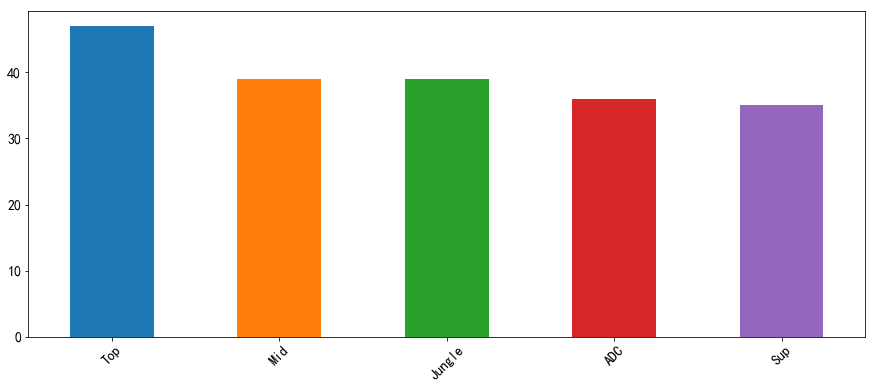

In [14]:
data_cn['Prefer Location'].value_counts().plot(kind = 'bar',rot = 45)
plt.show()

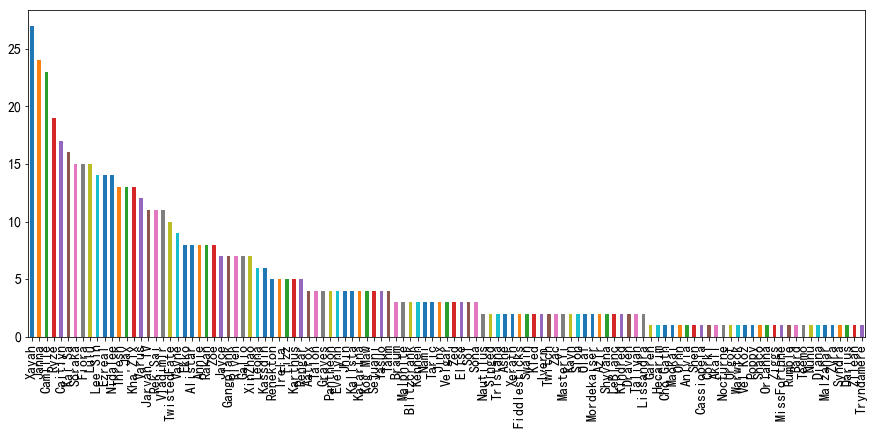

In [16]:
pandas.concat([data_cn['Prefer Hero 1'],data_cn['Prefer Hero 2'],data_cn['Prefer Hero 3']]).value_counts().plot(kind = 'bar',rot = 90)

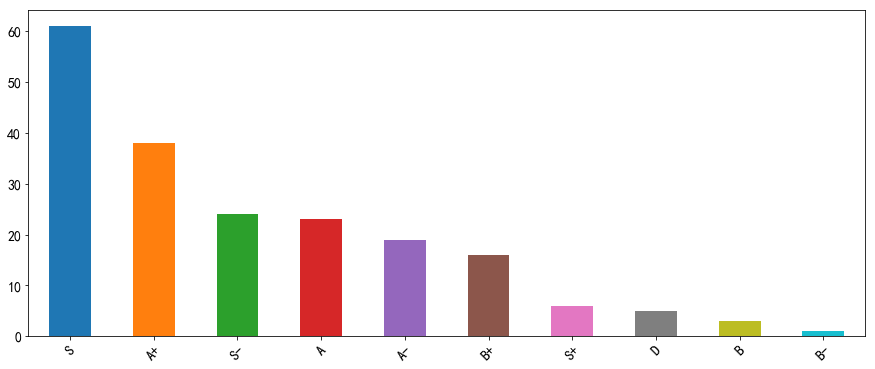

In [7]:
data_cn['Performance'].value_counts().plot(kind = 'bar',rot = 45)
plt.show()